In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pandas_profiling as pp

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
sys.path.append('../../utils')

import utils as utils

### Getting repositories file

For a specific language, open the filtered file (whithout sufix `_all_dates`).

In [167]:
filename = 'complete_repositories.csv'
rep_jupyter_file_path = os.path.join(utils.get_main_path(), 'data', 'crawler', 'repositories', 
                                     'jupyter+notebook', 'deduplicated_data',filename)
rep_python_file_path = os.path.join(utils.get_main_path(), 'data', 'crawler', 'repositories', 
                                    'python', 'deduplicated_data',filename)

rep_jupyter_df = pd.read_csv(rep_jupyter_file_path)
rep_python_df = pd.read_csv(rep_python_file_path)

rep_jupyter_df.columns

/mnt/d/Documents/UFMG/Mestrado/Dissertação/Project/network_analysis_github/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url',
       'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'has_issues',
       'has_projects', 'has_downloads', 'has_wiki', 'has

Filter columns with relevant data of the repository

In [173]:
columns_list = ['id',
             'name', 
             'full_name',
             'owner',
             'description',
             'created_at',
             'updated_at',
             'pushed_at',
             'homepage',
             'size',
             'stargazers_count',
             'watchers_count',
             'forks_count',
             'open_issues_count',
             'archived',
             'disabled',
             'score']

rep_jupyter_df = rep_jupyter_df[columns_list]
rep_jupyter_df['size_mb'] = rep_jupyter_df['size'].map(lambda x: x/1000)
rep_jupyter_df['language'] = 'Jupyter Notebook'

rep_python_df = rep_python_df[columns_list]
rep_python_df = rep_python_df[rep_python_df['created_at'] < '2020-12-31'] 
rep_python_df['size_mb'] = rep_python_df['size'].map(lambda x: x/1000)
rep_python_df['language'] = 'Python'

In [174]:
complete_df = pd.concat([rep_jupyter_df, rep_python_df])
complete_df

id                               name  \
0       272836371           fourier-feature-networks   
1        55245877                         sas_kernel   
2       231877160         Machine-learning-portfolio   
3        51833329                    numerical_stats   
4       290450730                        xw2020-top1   
...           ...                                ...   
136057  322720803                         PythonPDDL   
136058  323491746  NumFOCUS_Telethon_by_James_Powell   
136059  323116511                           gpsanapy   
136060  317997977                                epl   
136061  318825710                               21V1   

                                            full_name  \
0                     tancik/fourier-feature-networks   
1                              sassoftware/sas_kernel   
2             emrahsariboz/Machine-learning-portfolio   
3                             whitead/numerical_stats   
4                               miziha-zp/xw2020-top1   
...                                               ...   
136057                        APLA-Toolbox/PythonPDDL   
136058  vitalizzare/NumFOCUS_Telethon_by_James_Powell   
136059                          jeanluc-auge/gpsanapy   
136060                         enrique-bustamante/epl   
136061                                    PtrMan/21V1   

                                                    owner  \
0       {'login': 'tancik', 'id': 3310961, 'node_id': ...   
1       {'login': 'sassoftware', 'id': 5289877, 'node_...   
2       {'login': 'emrahsariboz', 'id': 10096038, 'nod...   
3       {'login': 'whitead', 'id': 908389, 'node_id': ...   
4       {'login': 'miziha-zp', 'id': 65750219, 'node_i...   
...                                                   ...   
136057  {'login': 'APLA-Toolbox', 'id': 76218752, 'nod...   
136058  {'login': 'vitalizzare', 'id': 72524604, 'node...   
136059  {'login': 'jeanluc-auge', 'id': 29375413, 'nod...   
136060  {'login': 'enrique-bustamante', 'id': 45577266...   
136061  {'login': 'PtrMan', 'id': 1067920, 'node_id': ...   

                                              description  \
0       Fourier Features Let Networks Learn High Frequ...   
1       A Jupyter kernel for SAS. This opens up all th...   
2                              Machine learning portfolio   
3       Introduction to Numerical Methods and Statisti...   
4                         “2020创青春·交子杯” 挑战赛 AI算法赛道 TOP1方案   
...                                                   ...   
136057  🧭🔍 A PDDL Planner in Python partially wrapping...   
136058  NumFOCUS End-of-year Telethon: Hosted by James...   
136059         gps speed trace analysis for nautic sports   
136060                                                NaN   
136061                                                NaN   

                  created_at            updated_at             pushed_at  \
0       2020-06-16T23:54:50Z  2020-12-20T11:36:38Z  2020-09-01T16:36:52Z   
1       2016-04-01T16:19:50Z  2020-11-18T17:21:58Z  2020-09-01T16:49:41Z   
2       2020-01-05T06:25:11Z  2020-12-06T17:11:27Z  2020-09-01T03:05:26Z   
3       2016-02-16T12:11:55Z  2020-11-25T21:28:11Z  2020-09-01T20:57:14Z   
4       2020-08-26T09:15:35Z  2020-11-19T11:59:27Z  2020-09-01T06:57:09Z   
...                      ...                   ...                   ...   
136057  2020-12-18T22:45:06Z  2021-01-10T20:08:07Z  2021-01-10T20:08:05Z   
136058  2020-12-22T01:44:53Z  2021-01-10T17:47:38Z  2021-01-10T17:47:36Z   
136059  2020-12-20T16:33:49Z  2021-01-10T17:48:29Z  2021-01-10T17:48:27Z   
136060  2020-12-02T21:36:39Z  2021-01-10T22:49:47Z  2021-01-10T22:49:44Z   
136061  2020-12-05T15:45:24Z  2021-01-10T22:52:51Z  2021-01-10T22:52:49Z   

                                                 homepage   size  \
0       https://people.eecs.berkeley.edu/~bmild/fourfeat/  10816   
1                                                     NaN   2682   
2                                                     NaN  43804   
3     

### Comparing numerical values between languages

In [175]:
rep_jupyter_df.describe()

id          size  stargazers_count  watchers_count  \
count  3.194600e+04  3.194600e+04      31946.000000    31946.000000   
mean   2.543642e+08  6.257743e+04         52.066550       52.066550   
std    7.203189e+07  3.136365e+05        591.645349      591.645349   
min    1.211701e+06  0.000000e+00          0.000000        0.000000   
25%    2.192949e+08  7.930000e+02          1.000000        1.000000   
50%    2.861658e+08  5.792000e+03          1.000000        1.000000   
75%    3.087311e+08  3.364450e+04          5.000000        5.000000   
max    3.232725e+08  2.672908e+07      39521.000000    39521.000000   

        forks_count  open_issues_count    score       size_mb  
count  31946.000000       31946.000000  31946.0  31946.000000  
mean      24.706160           2.458430      1.0     62.577429  
std      380.414572          55.863457      0.0    313.636488  
min        0.000000           0.000000      1.0      0.000000  
25%        0.000000           0.000000      1.0      0.793000  
50%        0.000000           0.000000      1.0      5.792000  
75%        3.000000           0.000000      1.0     33.644500  
max    48972.000000        9511.000000      1.0  26729.079000

In [180]:
rep_jupyter_df[rep_jupyter_df['stargazers_count'] == 39521]

id                 name                          full_name  \
20472  45986162  TensorFlow-Examples  aymericdamien/TensorFlow-Examples   

                                                   owner  \
20472  {'login': 'aymericdamien', 'id': 10386605, 'no...   

                                             description  \
20472  TensorFlow Tutorial and Examples for Beginners...   

                 created_at            updated_at             pushed_at  \
20472  2015-11-11T14:21:19Z  2020-12-21T08:07:05Z  2020-12-05T10:49:47Z   

      homepage   size  stargazers_count  watchers_count  forks_count  \
20472      NaN  10225             39521           39521        14721   

       open_issues_count  archived  disabled  score  size_mb          language  
20472                205     False     False    1.0   10.225  Jupyter Notebook

In [176]:
rep_python_df.describe()

id          size  stargazers_count  watchers_count  \
count  1.325420e+05  1.325420e+05     132542.000000   132542.000000   
mean   2.243167e+08  2.537698e+04         96.667554       96.667554   
std    9.630912e+07  2.958582e+05       1105.354220     1105.354220   
min    4.557720e+05  0.000000e+00          0.000000        0.000000   
25%    1.566922e+08  5.500000e+01          1.000000        1.000000   
50%    2.583458e+08  4.370000e+02          2.000000        2.000000   
75%    3.094700e+08  5.789000e+03         11.000000       11.000000   
max    3.256724e+08  4.845916e+07     118265.000000   118265.000000   

        forks_count  open_issues_count     score        size_mb  
count  132542.00000      132542.000000  132542.0  132542.000000  
mean       24.26867           6.469889       1.0      25.376979  
std       303.22255          52.125333       0.0     295.858156  
min         0.00000           0.000000       1.0       0.000000  
25%         0.00000           0.000000       1.0       0.055000  
50%         1.00000           0.000000       1.0       0.437000  
75%         4.00000           2.000000       1.0       5.789000  
max     43301.00000        9429.000000       1.0   48459.162000

In [182]:
rep_python_df[rep_python_df['stargazers_count'] == 118265]

id                  name                         full_name  \
94880  83222441  system-design-primer  donnemartin/system-design-primer   

                                                   owner  \
94880  {'login': 'donnemartin', 'id': 5458997, 'node_...   

                                             description  \
94880  Learn how to design large-scale systems. Prep ...   

                 created_at            updated_at             pushed_at  \
94880  2017-02-26T16:15:28Z  2021-01-10T21:43:26Z  2020-12-29T02:51:34Z   

      homepage   size  stargazers_count  watchers_count  forks_count  \
94880      NaN  11144            118265          118265        21391   

       open_issues_count  archived  disabled  score  size_mb language  
94880                170     False     False    1.0   11.144   Python

### Pandas profilling

In [145]:
pp.ProfileReport(rep_jupyter_df)

In [146]:
pp.ProfileReport(rep_python_df)

### Stars and forks comparison

In [147]:
stars_df = complete_df[['language', 'forks_count', 'stargazers_count']].rename(columns={'stargazers_count': 'stars_count'})

stars_df['stars_log'] = stars_df['stars_count'].map(lambda x: 0 if x == 0 else np.log(x))
stars_df['forks_log'] = stars_df['forks_count'].map(lambda x: 0 if x == 0 else np.log(x))

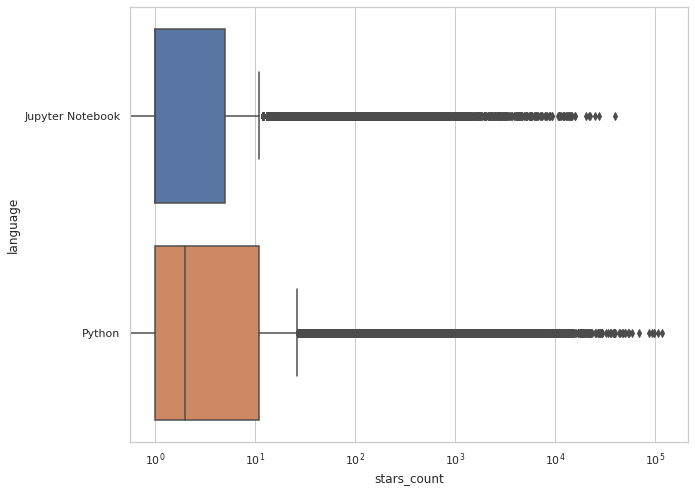

In [184]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="stars_count", y="language", data=stars_df)
ax.set_xscale("log")

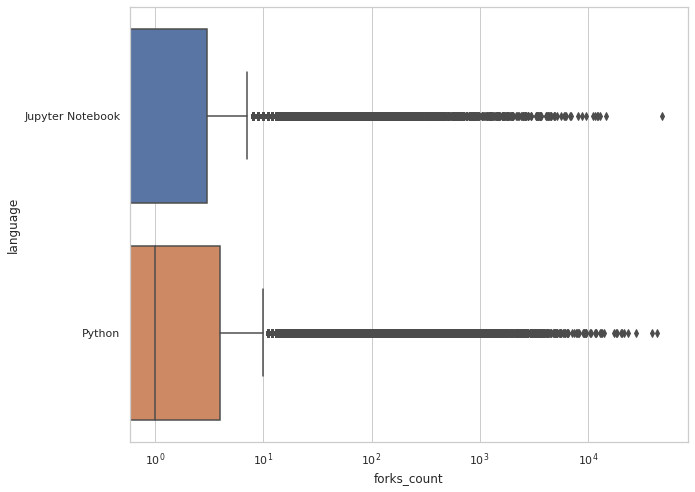

In [189]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="forks_count", y="language", data=stars_df)
ax.set_xscale("log")

### Creation date

In [150]:
creation_date_df = complete_df[['language', 'created_at']]
creation_date_df['year'] = pd.DatetimeIndex(creation_date_df['created_at']).year
creation_date_df

/mnt/d/Documents/UFMG/Mestrado/Dissertação/Project/network_analysis_github/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


language            created_at  year
0       Jupyter Notebook  2020-06-16T23:54:50Z  2020
1       Jupyter Notebook  2016-04-01T16:19:50Z  2016
2       Jupyter Notebook  2020-01-05T06:25:11Z  2020
3       Jupyter Notebook  2016-02-16T12:11:55Z  2016
4       Jupyter Notebook  2020-08-26T09:15:35Z  2020
...                  ...                   ...   ...
136057            Python  2020-12-18T22:45:06Z  2020
136058            Python  2020-12-22T01:44:53Z  2020
136059            Python  2020-12-20T16:33:49Z  2020
136060            Python  2020-12-02T21:36:39Z  2020
136061            Python  2020-12-05T15:45:24Z  2020

[164488 rows x 3 columns]

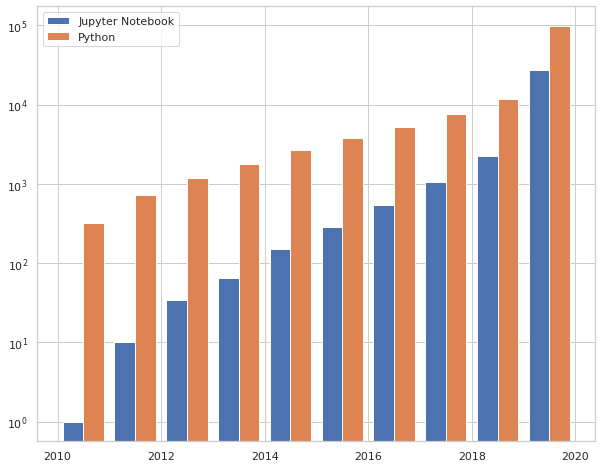

In [156]:
x = creation_date_df[creation_date_df['language'] == 'Jupyter Notebook']['year']
y = creation_date_df[creation_date_df['language'] == 'Python']['year']
plt.figure(figsize=(10,8))
plt.hist([x, y], bins=10)
plt.yscale('log')
plt.legend(['Jupyter Notebook', 'Python'])
plt.show()

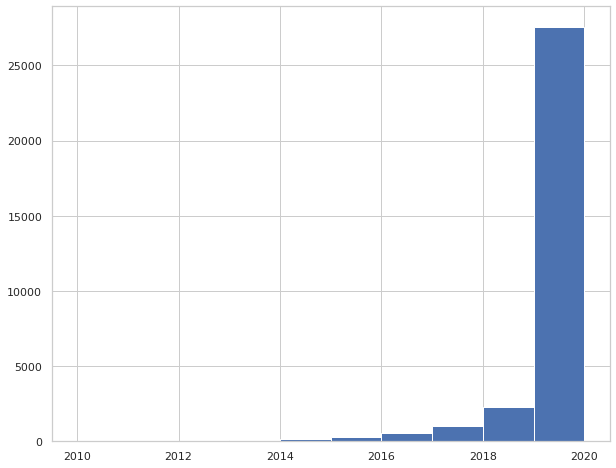

In [152]:
plt.figure(figsize=(10,8))
plt.hist(x, bins=10)
plt.show()

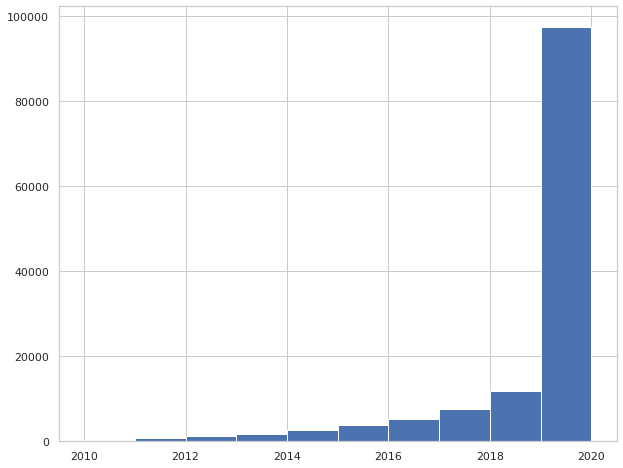

In [153]:
plt.figure(figsize=(10,8))
plt.hist(y, bins=10)
plt.show()

In [154]:
creation_date_df.groupby(['language', 'year']).count()

created_at
language         year            
Jupyter Notebook 2010           1
                 2011          10
                 2012          34
                 2013          65
                 2014         150
                 2015         287
                 2016         545
                 2017        1049
                 2018        2258
                 2019        4492
                 2020       23055
Python           2010         323
                 2011         722
                 2012        1198
                 2013        1786
                 2014        2635
                 2015        3811
                 2016        5159
                 2017        7670
                 2018       11831
                 2019       20124
                 2020       77283

In [166]:
print(complete_df.iloc[0]['owner'])

{'login': 'tancik', 'id': 3310961, 'node_id': 'MDQ6VXNlcjMzMTA5NjE=', 'avatar_url': 'https://avatars0.githubusercontent.com/u/3310961?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/tancik', 'html_url': 'https://github.com/tancik', 'followers_url': 'https://api.github.com/users/tancik/followers', 'following_url': 'https://api.github.com/users/tancik/following{/other_user}', 'gists_url': 'https://api.github.com/users/tancik/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/tancik/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/tancik/subscriptions', 'organizations_url': 'https://api.github.com/users/tancik/orgs', 'repos_url': 'https://api.github.com/users/tancik/repos', 'events_url': 'https://api.github.com/users/tancik/events{/privacy}', 'received_events_url': 'https://api.github.com/users/tancik/received_events', 'type': 'User', 'site_admin': False}
